In [131]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

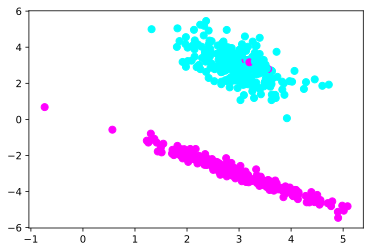

In [132]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, 
    n_features=2, 
    n_redundant = 0,
    n_informative = 2,
    n_repeated = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    class_sep=3, 
    flip_y=0.01,
    random_state=1) 
#X,y = make_blobs(n_samples=500,centers=2,random_state=1,cluster_std=.50)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='cool')

In [133]:
def plot_scv_decision_function(model,ax=None,plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundry and margins
    ax.contour(X, Y, P, colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

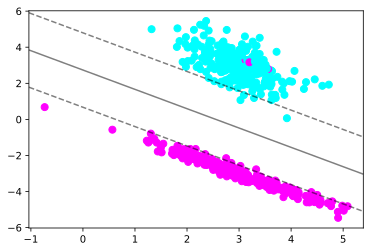

In [134]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="cool")
plot_scv_decision_function(svm)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=1)
svm.fit(X_train, Y_train)
print(svm.score(X_test, Y_test))
#As we can see, our accuracy is perfect.

0.992


Now using non-linear data to test SVM kerenels.

0.686


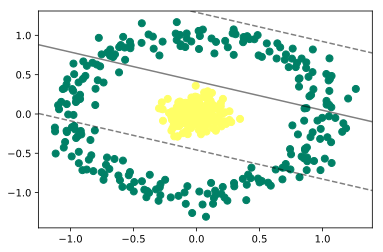

In [136]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons
X,y = make_circles(500,factor=.1,noise=.1)
#X, y = make_moons(500, noise=0.2, shuffle=True, random_state=0)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer');
plot_scv_decision_function(clf,plot_support=False)
print(clf.score(X,y))
#As we can see, our accuracy is poor.

Clearly, SVM with linear kernel fails, so we shall try RBF.

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

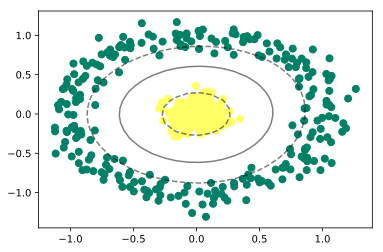

In [137]:
clf = SVC(kernel='rbf').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer');
plot_scv_decision_function(clf,plot_support=False)
clf.score(X,y)
#RBF Kernel SVM gives perfect accuracy as expected.

SVM for Regression (with Generated Data)

In [138]:
from sklearn.svm import SVR
X = np.sort(10 * np.random.rand(60, 1), axis=0)
y = np.sin(X).ravel()
y[::10] += 3 * (0.5 - np.random.rand(6))

In [139]:
svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e2)
svr_poly = SVR(kernel='poly', C=1e2, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


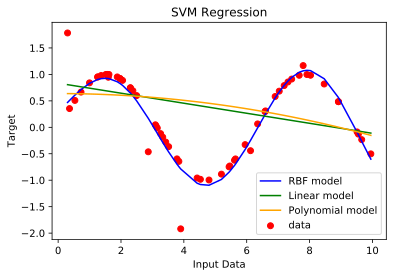

In [140]:
lw = 1.5
plt.scatter(X, y, color='red', label='data')
plt.plot(X, y_rbf, color='blue', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='green', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='orange', lw=lw, label='Polynomial model')
plt.xlabel('Input Data')
plt.ylabel('Target')
plt.title('SVM Regression')
plt.legend()
plt.show()

CCPP Dataset

In [141]:
ccpp = pd.read_csv("CCPP.csv")
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [142]:
X = ccpp[['AT']].values
y = ccpp['PE'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [143]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='green')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

In [144]:
svr_lin = SVR(kernel='linear', C=1e2)
y_lin = svr_lin.fit(X_train, y_train)
svr_lin.score(X_test, y_test)

0.9015654552221188

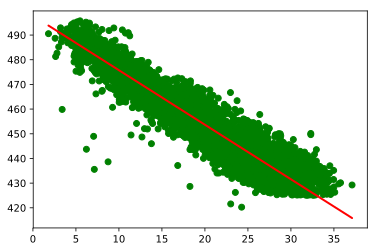

In [145]:
lin_regplot(X_train, y_train, svr_lin)